In [5]:
import pickle5 as pickle
from PIL import Image
import json


with open("output/ours/frei/gcn/hrnet/loss/heatmap/add/gcn_0_0_1_layer_2/pred_gcn_0_0_1_layer_2.json") as f:
    model1 = json.load(f)[0]

with open("output/ours/frei/ori/pred_ori.json") as f:
    model2 = json.load(f)[0]
    
with open("output/ours/max_error_index.json") as f:
    error_index = json.load(f)


In [15]:

with open("../../datasets/frei_test/evaluation_xyz.json") as f:
    gt_meta = json.load(f)

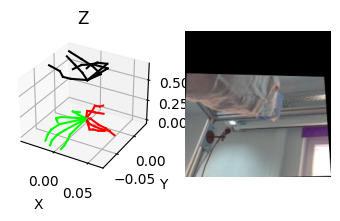

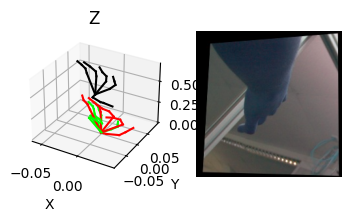

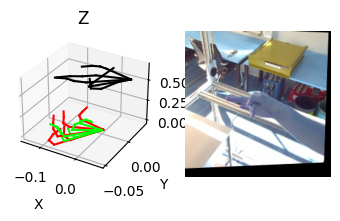

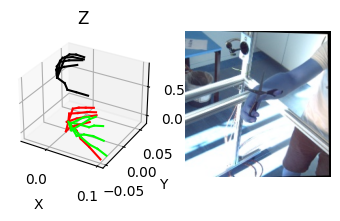

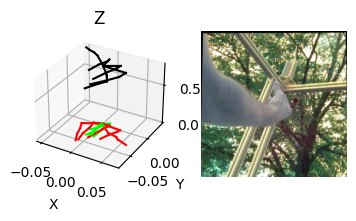

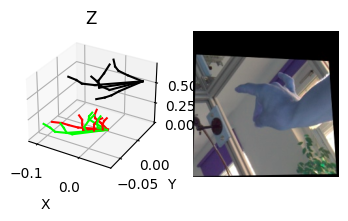

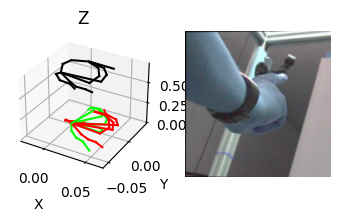

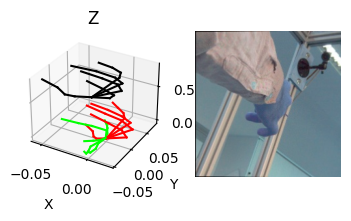

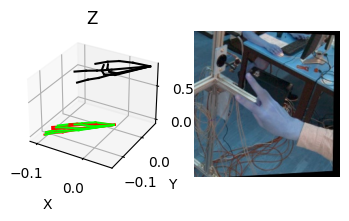

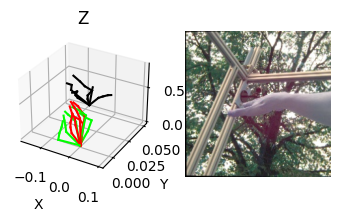

In [18]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
import cv2



for idx in error_index:
    gt = gt_meta[idx]
    pred1 = model1[idx]
    pred2 = model2[idx]
    fig = plt.figure(dpi= 100)
    ax1 = fig.add_subplot(131, projection ='3d')
    ax2 = fig.add_subplot(132)
    parents = [-1, 0, 1, 2, 3, 0, 5, 6, 7, 0, 9, 10, 11, 0, 13, 14, 15, 0, 17, 18, 19]

    for num in range(1,21):
        
        # ax1.scatter(joint_3d[num][0], joint_3d[num][1], joint_3d[num][2], c = 'blue')
        ax1.plot([gt[num][0], gt[parents[num]][0]], [gt[num][1], gt[parents[num]][1]], [gt[num][2], gt[parents[num]][2]], c = np.array((0, 0, 0))/255.)
        ax1.plot([pred1[num][0], pred1[parents[num]][0]], [pred1[num][1], pred1[parents[num]][1]], [pred1[num][2], pred1[parents[num]][2]], c = np.array((255, 0, 0))/255.)
        ax1.plot([pred2[num][0], pred2[parents[num]][0]], [pred2[num][1], pred2[parents[num]][1]], [pred2[num][2], pred2[parents[num]][2]], c = np.array((0, 255, 0))/255.)
        
    img = cv2.imread(f'../../datasets/frei_test/evaluation/rgb/{str(idx).zfill(8)}.jpg')
    ax2.imshow(img)
    ax2.set_axis_off()
    ax1.set_xlabel("X")
    ax1.set_ylabel("Y")
    ax1.set_title("Z")
    plt.show()

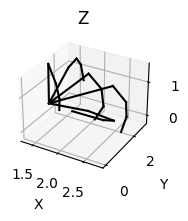

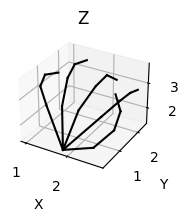

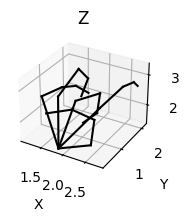

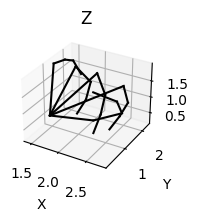

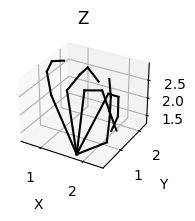

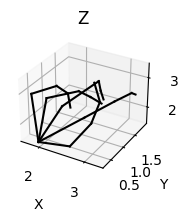

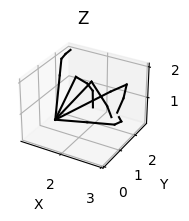

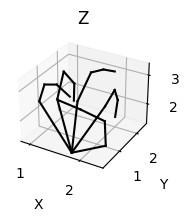

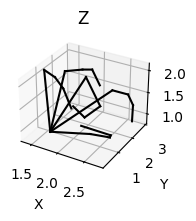

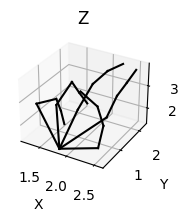

In [18]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np

for idx in range(10):
    joint_3d = meta[f'{idx}']['world_coord'][:21]
    fig = plt.figure(dpi= 100)
    ax1 = fig.add_subplot(131, projection ='3d')
    parents = [-1, 0, 1, 2, 3, 0, 5, 6, 7, 0, 9, 10, 11, 0, 13, 14, 15, 0, 17, 18, 19]
    
    for num in range(1,21):
        # ax1.scatter(joint_3d[num][0], joint_3d[num][1], joint_3d[num][2], c = 'blue')
        ax1.plot([joint_3d[num][0], joint_3d[parents[num]][0]], [joint_3d[num][1], joint_3d[parents[num]][1]], [joint_3d[num][2], joint_3d[parents[num]][2]], c = np.array((0, 0, 0))/255.)
        
    ax1.set_xlabel("X")
    ax1.set_ylabel("Y")
    ax1.set_title("Z")
    plt.show()
